# Data Analysis and Evaluation:

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from datetime import datetime
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.dates as dt

In [367]:
# read in polished dataset from collection-final.ipynb
data = pd.read_csv("data.csv", index_col=0)
data.head()

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,digeorge syndrome (22q11.2 deletion syndrome),45,DiGeorge syndrome (22q11.2 deletion syndrome) ...,151,57561,2212,13,7,70,44,67,45,0,2017-07-18
1,https://www.mayoclinic.org/diseases-conditions...,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,31,19,100,71,75,52,1,2019-06-20
2,https://www.mayoclinic.org/diseases-conditions...,abdominal aortic aneurysm,25,An abdominal aortic aneurysm can grow slowly a...,128,48752,1530,26,15,78,49,67,45,0,2019-03-15
3,https://www.mayoclinic.org/diseases-conditions...,hyperhidrosis,13,"Learn more about causes, symptoms, treatment a...",153,45026,1385,16,11,75,46,67,45,0,2017-10-27
4,https://www.mayoclinic.org/diseases-conditions...,bartholin's cyst,16,A Bartholin's cyst is a fluid-filled lump near...,126,43037,1202,12,6,70,44,67,45,0,2020-04-24


In [420]:
data.head(2)

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,digeorge syndrome (22q11.2 deletion syndrome),45,DiGeorge syndrome (22q11.2 deletion syndrome) ...,151,57561,2212,13,7,70,44,67,45,0,736528.0
1,https://www.mayoclinic.org/diseases-conditions...,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,31,19,100,71,75,52,1,737230.0


In [421]:
# triple check for null values
data.isnull().values.any()

False

In [422]:
# final dataset counts
data.shape

(1145, 15)

In [423]:
# columns of data to work with
data.columns

Index(['url', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext', 'top', 'pub_date'],
      dtype='object')

In [270]:
# function to examine a column of data with summary functions and visual displays
def examine(df, column, bins):
    plt.hist(df[column], bins=bins)
    plt.title(column)
    plt.show()
    print("min:", df[column].min())
    print("max:", df[column].max())
    print("mean:", df[column].mean())
    print("variance:", df[column].var())
    print("stan dev:", df[column].std())

In [271]:
# function to model patterns or relationships between variables
def relate(x, y):
    print("Covariance:", round(np.cov(x, y)[0,1],5))
    print("Correlation:", round(np.corrcoef(x,y)[0,1],5))
    xdata = x.values.reshape(-1,1)
    ydata = y.values.reshape(-1,1)
    mod = LinearRegression().fit(xdata, ydata)
    print("R squared:", round(mod.score(xdata, ydata),5))
    print("Linear Regression Slope:", mod.coef_[0][0])

In [272]:
# function to look at the data in a specific range (excluding outliers)
def exclude(df, column, start, end, bins):
    plt.hist(df[column], range = (start, end), bins=bins)
    plt.title(column + ": range " + str(start) + " - " + str(end))
    plt.show()

In [454]:
# compute and display logistic regression
def log_reg(column1, column2):
    model = LogisticRegression(solver="lbfgs").fit(column1.values.reshape(-1, 1), column2)
    model.coef_, model.intercept_

    x_values = np.linspace(0, 25, 100)
    y_values = (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])) / (1 + (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])))
    
    plt.scatter(column1, column2 + np.random.normal(0, 0.05, size=len(column1)), alpha=0.1)
    plt.plot(x_values, y_values)
    plt.show()

In [424]:
# Symptoms and Causes pages that were listed in the 500 top-ranking pages of the Mayo Clinic's domain by Moz

ranked = data[data['top']==1]
print(((len(ranked) / len(data)) * 100), "% of pages in this dataset are in the Mayo Clinic's 500 top-ranking pages for 'page authority'.")

18.8646288209607 % of pages in this dataset are in the Mayo Clinic's 500 top-ranking pages for 'page authority'.


In [425]:
# create separate dataframe with ranked pages
ranked.columns

Index(['url', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext', 'top', 'pub_date'],
      dtype='object')

In [426]:
ranked.shape

(216, 15)

### header

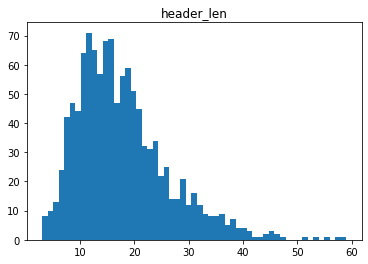

min: 3
max: 59
mean: 17.97292576419214
variance: 69.04909151983388
stan dev: 8.309578299759494


In [273]:
examine(data, "header_len", 55)

SEO strategy recommends short, descriptive h1 headers that contains a page keyword; here, that means the name of the condition. It thus is unsurprising that the data peaks between 10 and 20 characters. It is not quite a normal distribution, since headers are more likely to have more characters than fewer; those that have more are likely conditions with long names or two different names (one more scientific, one translated from medical terminology into a name more evident), where one is listed after the other in parentheses. 

In [78]:
# like these
data[data["header_len"]>40]['header'].values.tolist()

['digeorge syndrome (22q11.2 deletion syndrome)',
 'attention-deficit/hyperactivity disorder (adhd) in children',
 'adult attention-deficit/hyperactivity disorder (adhd)',
 'benign paroxysmal positional vertigo (bppv)',
 'subconjunctival hemorrhage (broken blood vessel in eye)',
 'paraneoplastic syndromes of the nervous system',
 'central nervous system vascular malformations',
 'diffuse idiopathic skeletal hyperostosis (dish)',
 'persistent depressive disorder (dysthymia)',
 'premature ventricular contractions (pvcs)',
 'focal segmental glomerulosclerosis (fsgs)',
 'functional neurologic disorders/conversion disorder',
 'helicobacter pylori (h. pylori) infection',
 'monoclonal gammopathy of undetermined significance (mgus)',
 'multiple endocrine neoplasia, type 1 (men 1)',
 'orthostatic hypotension (postural hypotension)',
 'small intestinal bacterial overgrowth (sibo)',
 'spontaneous coronary artery dissection (scad)']

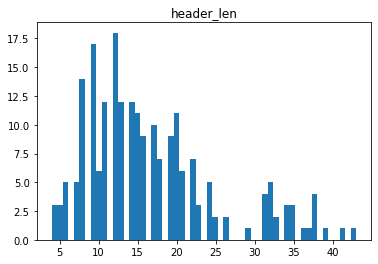

min: 4
max: 43
mean: 16.62037037037037
variance: 72.02265288544359
stan dev: 8.486616103338456


In [427]:
# similar shape with only top-ranked pages
examine(ranked, "header_len", 55)

### meta description

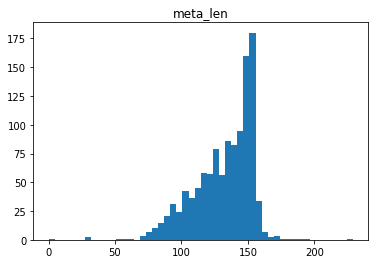

min: 0
max: 229
mean: 132.05502183406114
variance: 493.88245946193547
stan dev: 22.223466414174354


In [274]:
examine(data, "meta_len", 50)

In [87]:
# check higher values
data.loc[data["meta_len"]>200]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
1077,https://www.mayoclinic.org/diseases-conditions...,supraventricular tachycardia,28,Supraventricular tachycardia (SVT) is an abnor...,229,55958,2211,22,11,80,51,67,45,0,2019-11-13


In [96]:
# check how many are longer than 160 characters
len(data.loc[data["meta_len"]>160])

18

According to Moz (https://moz.com/learn/seo/meta-description), Google usually only shows meta descriptions up to 160 characters long. The Mayo Clinic has kept all but 18 of their Symptoms and Causes meta descriptions within this limit.

In [89]:
# check lower values
data.loc[data["meta_len"]<50]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
131,https://www.mayoclinic.org/diseases-conditions...,aortic valve disease,20,What is aortic valve disease?,29,53338,1681,16,11,79,50,68,46,0,2020-01-09
834,https://www.mayoclinic.org/diseases-conditions...,mitral valve disease,20,What is mitral valve disease?,30,54820,1704,24,15,84,55,68,46,0,2020-01-07
1085,https://www.mayoclinic.org/diseases-conditions...,tapeworm infection,18,,0,47202,1731,15,6,71,45,67,45,0,2017-12-15


On at least one of their pages (Tapeworm Infection), they did not provide a meta description. That's not an enormous problem, since providing one is not necessary, but they have them for all of their other pages since it is a commonly cited SEO best practice to tell search engines exactly what you want them to display to rank better with their algorithm.

Google provides this snippet when you search for "tapeworm mayo clinic": "Invasive infection. If tapeworm larvae have migrated out of your intestines and formed cysts in other tissues, they can eventually cause organ and ..."
(https://www.google.com/search?q=tapeworm+mayo+clinic&rlz=1C5CHFA_enUS814US814&oq=mayo+tape&aqs=chrome.3.69i57j0l7.3705j0j7&sourceid=chrome&ie=UTF-8)

The other two pages with descriptions under 50 characters are pages for which the Mayo Clinic has simply provided a "What is...?" Jeopardy question (answer?) for the meta descriptions instead of giving more detail.

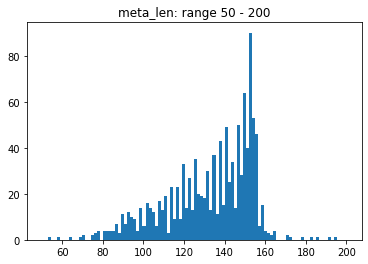

In [275]:
exclude(data, "meta_len", 50, 200, 100)

Upon looking closer at the data by limiting the range we look at, we can see an even more defined peak around 160 characters.

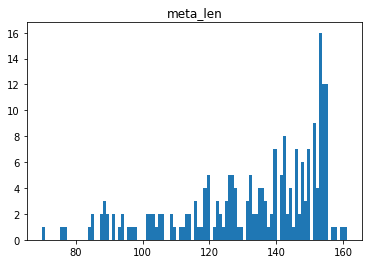

min: 70
max: 161
mean: 132.91666666666666
variance: 436.71860465116276
stan dev: 20.897813394017152


In [430]:
# same peak with only top-ranked pages
examine(ranked, "meta_len", 100)

### word count

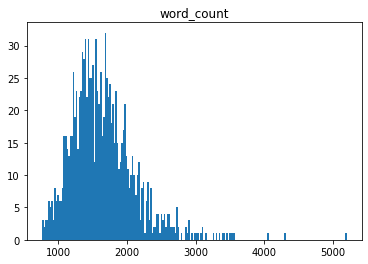

min: 768
max: 5194
mean: 1654.593886462882
variance: 227073.3847528018
stan dev: 476.5221765592886


In [276]:
examine(data, "word_count", 200)

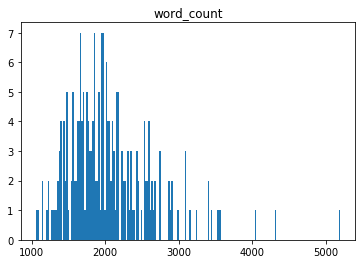

min: 1055
max: 5194
mean: 2050.3333333333335
variance: 347291.97209302324
stan dev: 589.314832744793


In [308]:
examine(ranked, "word_count", 200)

Word count is a little more difficult to analyze in terms of SEO. Web pages should not be too thin, and should include good "anchor content" unique to the page and the subject, but lots of content does not necessarily mean that it is of good quality. There is a general consensus in the SEO world that a word count of around 1500 is average for high-ranking pages, though the suggested amount of content varies for different kinds of web pages (such as a blog versus a healthcare education page). The Mayo Clinic's average word count is 1655 for their Symptoms and Causes pages, but we can see from the histogram that there appear to be some outliers affecting that number.

In [97]:
data.loc[data["word_count"]==5194]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,2020-05-12


Unsurprisingly, the page with the highest word count is a page on COVID-19 to which the Mayo Clinic may well still be adding as the world continues to research the virus that has caused the current pandemic. The publication date is listed as May 12, 2020, within this month.

In [98]:
# other pages with word count far above average
data.loc[data["word_count"]>4000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
30,https://www.mayoclinic.org/diseases-conditions...,drug addiction (substance use disorder),39,"With drug addiction (substance use disorder), ...",160,70000,4308,10,5,74,46,69,46,1,2017-10-26
327,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1,2018-03-22
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,2020-05-12


The other pages with high word count are heart disease and substace abuse disorder. Both are relatively common conditions, and both describe a range of conditions, explaining the need for more words.

### page size

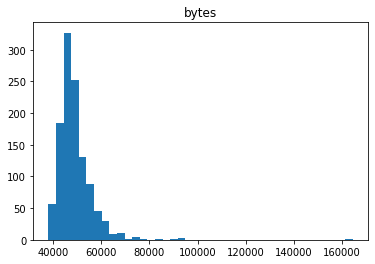

min: 38098
max: 164386
mean: 49090.52139737991
variance: 54176621.569690354
stan dev: 7360.476993353784


In [277]:
examine(data, "bytes", 40)

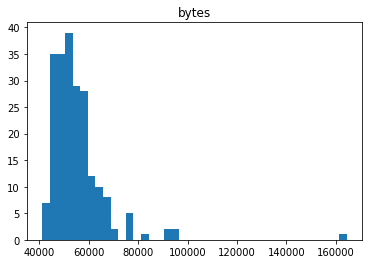

min: 41133
max: 164386
mean: 55134.17592592593
variance: 138044112.84332475
stan dev: 11749.217541748249


In [309]:
examine(ranked, "bytes", 40)

In [106]:
# unsurprisingly, the outlier is again coronavirus!
data.loc[data["bytes"]==164386]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,2020-05-12


In [105]:
# check if it's the only real outlier
data[data.bytes>100000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,2020-05-12


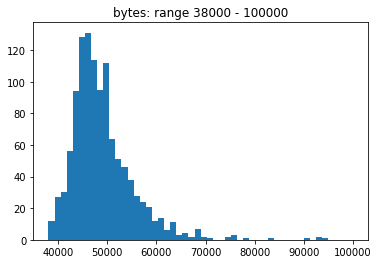

In [278]:
exclude(data, "bytes", 38000, 100000, 50)

Besides the page on coronavirus, there are still a number of larger pages far from the peak:

In [107]:
data.loc[data.bytes>75000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1,2018-12-08
220,https://www.mayoclinic.org/diseases-conditions...,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,9,3,131,92,85,58,1,2018-05-12
238,https://www.mayoclinic.org/diseases-conditions...,stroke,6,Promptly spotting stroke symptoms leads to fas...,89,75718,3539,23,15,92,61,86,63,1,2020-04-24
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1,2019-11-22
275,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1,2018-12-12
301,https://www.mayoclinic.org/diseases-conditions...,pancreatic cancer,17,"Pancreatic cancer — Overview covers symptoms, ...",152,76004,2881,21,11,93,64,87,63,1,2020-04-24
327,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1,2018-03-22
379,https://www.mayoclinic.org/diseases-conditions...,depression (major depressive disorder),38,Depression is a mood disorder that causes a pe...,141,75409,2681,12,6,120,81,80,57,1,2018-02-03
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,2020-05-12
482,https://www.mayoclinic.org/diseases-conditions...,diabetes,8,Learn more about the different types of this b...,109,78005,3448,7,2,132,92,70,47,1,2018-08-08


Again, the trend makes sense, as these larger pages are all about more commonly diagnosed conditions that have various forms. These also are all listed among the top 500 ranking pages of the Mayo Clinic domain.

In [267]:
data.loc[data.bytes>75000]["top"]

78     1
220    1
238    1
242    1
275    1
301    1
327    1
379    1
418    1
482    1
978    1
Name: top, dtype: int64

### links

**inlinks** – Number of links to this page on the Mayo Clinic domain.

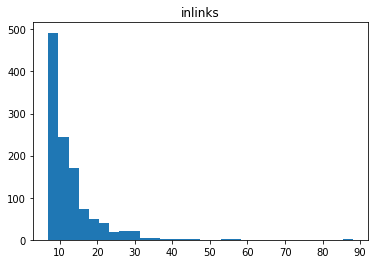

min: 7
max: 88
mean: 12.442794759825327
variance: 45.03540476990259
stan dev: 6.710842329387764


In [279]:
examine(data, "inlinks", 30)

Most Symptoms and Causes pages on the Mayo Clinic site seem to have around 10 other Mayo Clinic pages linking to them. These would likely be related conditions and the Diagnosis and Treatment, Doctors and Departments, and Care at Mayo Clinic pages for the condition, as well as the index page the condition is listed under and any other related page on the website that for which linking to a Symptoms and Causes page would make sense.

In [108]:
data[data.inlinks>60]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1,2019-11-22


It's interesting that breast cancer is the page with the most internal inlinks of those I am examining. There are several types of breast cancer as well as conditions that can lead to breast cancer, and of course there are also many other kinds of cancer. It is possible that such pages link between one another on the Mayo Clinic domain.

**unique inlinks** – Number of links to this page on the Mayo Clinic domain with links from the same page counted only once.

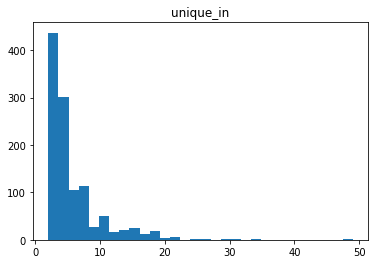

min: 2
max: 49
mean: 5.716157205240175
variance: 20.588069136104068
stan dev: 4.537407755106881


In [280]:
examine(data, "unique_in", 30)

This data largely resembles the total inlinks, except on a somewhat smaller scale.

In [281]:
relate(data.inlinks, data.unique_in)

Covariance: 29.57859
Correlation: 0.97139
R squared: 0.94359
Linear Regression Slope: 0.6567852852612575


In [114]:
data[data.unique_in>35]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1,2019-11-22


As one would therefore expect, the page that had the most inlinks also has the most unique inlinks.

**outlinks** – Number of links from this page to other pages on the Mayo Clinic domain.

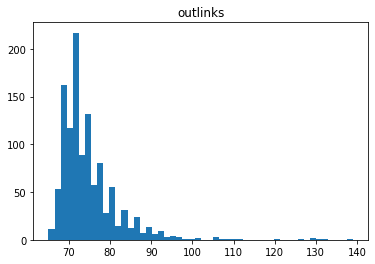

min: 65
max: 139
mean: 74.75633187772925
variance: 62.18969981983083
stan dev: 7.886044624514296


In [282]:
examine(data, "outlinks", 50)

We can see that Symptoms and Causes pages tend to link more to other page on the Mayo Clinic domain than be linked to. This is largely intuitive since it is more common for pages about conditions and diseases to link to pages for clinics that treat them, research summaries about them, or patient stories than for those pages to link back to the page for the condition itself. 

**unique outlinks** – Number of links from this page to other pages on the Mayo Clinic domain with links to the same page counted only once.

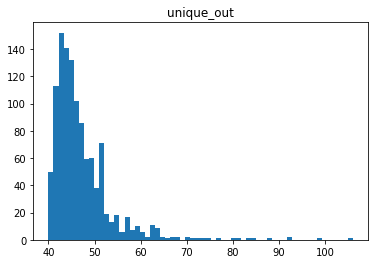

min: 40
max: 106
mean: 47.21310043668122
variance: 42.61713592084771
stan dev: 6.528180138510863


In [283]:
examine(data, "unique_out", 60)

Again, this data resembles the data for total outlinks in shape.

**external (out)links** – Number of links from this page to another website.

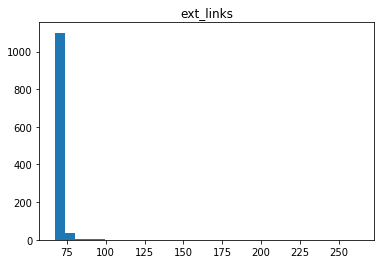

min: 67
max: 263
mean: 68.6410480349345
variance: 41.44359330625706
stan dev: 6.437669866206022


In [284]:
examine(data, "ext_links", 30)

This outlier is more extreme than the others we have seen in the data so far.

In [36]:
data[data.ext_links>100]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
275,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1,NaN
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,NaN


And we see why: the Symptoms and Causes pages on the Mayo Clinic domain with the most links to other websites are those for cancer and coronavirus, widespread, newsworthy, very serious conditions that are currently affecting the lives of many, and about which people need a wealth of information to learn from and respond to to help with prevention and treatment.

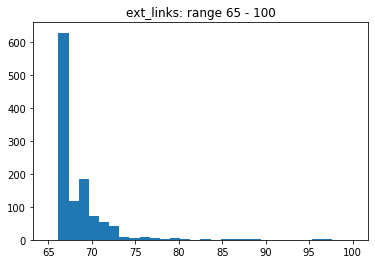

In [285]:
exclude(data, "ext_links", 65, 100, 30)

In [38]:
data[data.ext_links>80]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1,NaN
220,https://www.mayoclinic.org/diseases-conditions...,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,9,3,131,92,85,58,1,NaN
238,https://www.mayoclinic.org/diseases-conditions...,stroke,6,Promptly spotting stroke symptoms leads to fas...,89,75718,3539,23,15,92,61,86,63,1,NaN
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1,NaN
275,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1,NaN
280,https://www.mayoclinic.org/diseases-conditions...,colon cancer,12,Find out about symptoms and risk factors for c...,158,67832,2531,43,21,96,64,83,60,1,NaN
301,https://www.mayoclinic.org/diseases-conditions...,pancreatic cancer,17,"Pancreatic cancer — Overview covers symptoms, ...",152,76004,2881,21,11,93,64,87,63,1,NaN
327,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1,NaN
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,NaN
604,https://www.mayoclinic.org/diseases-conditions...,influenza (flu),15,"Learn more about the symptoms, causes and prev...",131,68565,2899,8,3,82,50,89,66,1,NaN


Other such pages include different forms of cancer and common, perilous conditions.

**unique external links** – Number of links from this page to another website with links to the same page counted only once.

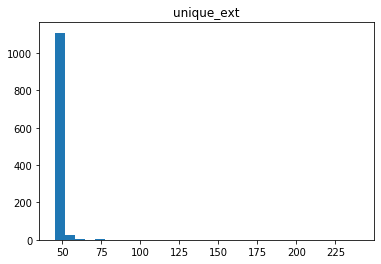

min: 45
max: 240
mean: 46.287336244541486
variance: 39.22768039820442
stan dev: 6.263200491618037


In [286]:
examine(data, "unique_ext", 30)

In [40]:
data[data.unique_ext>80]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,NaN


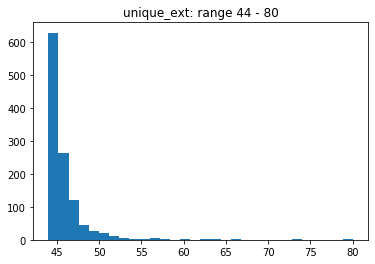

In [287]:
exclude(data, "unique_ext", 44,80, 30)

In [42]:
data[data.unique_ext>55]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1,NaN
220,https://www.mayoclinic.org/diseases-conditions...,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,9,3,131,92,85,58,1,NaN
238,https://www.mayoclinic.org/diseases-conditions...,stroke,6,Promptly spotting stroke symptoms leads to fas...,89,75718,3539,23,15,92,61,86,63,1,NaN
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1,NaN
275,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1,NaN
280,https://www.mayoclinic.org/diseases-conditions...,colon cancer,12,Find out about symptoms and risk factors for c...,158,67832,2531,43,21,96,64,83,60,1,NaN
301,https://www.mayoclinic.org/diseases-conditions...,pancreatic cancer,17,"Pancreatic cancer — Overview covers symptoms, ...",152,76004,2881,21,11,93,64,87,63,1,NaN
327,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1,NaN
379,https://www.mayoclinic.org/diseases-conditions...,depression (major depressive disorder),38,Depression is a mood disorder that causes a pe...,141,75409,2681,12,6,120,81,80,57,1,NaN
418,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1,NaN


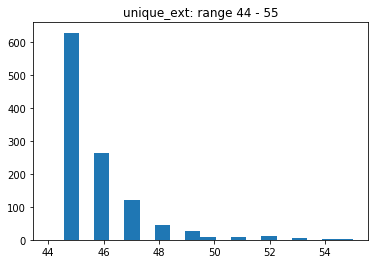

In [288]:
exclude(data, "unique_ext", 44, 55, 20)

In [462]:
lim = data[data.unique_ext<55]

### publication date

In [368]:
data.pub_date[0]

'2017-07-18'

In [369]:
# check date type
type(data.pub_date[0])

str

In [370]:
# convert pub_date from string to datetime_ob
dat = []
for date in data.pub_date:
    ob = datetime.strptime(date, '%Y-%m-%d')
    dat.append(ob)
    
# convert pub_date from datetime_ob to float
data.pub_date = dt.date2num(dat)
type(data["pub_date"][0])

numpy.float64

In [409]:
print("min:", data["pub_date"].min(), dt.num2date(data["pub_date"].min()).strftime('%Y-%m-%d'))
print("max:", data["pub_date"].maxdef pub(col, colname):
    plt.plot_date(x=data["pub_date"], y=col, xdate=True, ydate=False, alpha=0.5)
    plt.title("publication date, " + colname)
    plt.show()

data.columns

compare = ['header_len', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext']

for col in compare:
    pub(data[col], col)(), dt.num2date(data["pub_date"].max()).strftime('%Y-%m-%d'))

min: 735352.0 2014-04-29
max: 737565.0 2020-05-20


In [410]:
data[data.pub_date == 735352.0]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
765,https://www.mayoclinic.org/diseases-conditions...,juvenile fibromyalgia,21,Juvenile fibromyalgia — Comprehensive overview...,133,43108,1373,7,2,67,41,67,45,0,735352.0


In [465]:
data[data.pub_date == 737565.0]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
428,https://www.mayoclinic.org/diseases-conditions...,sudden infant death syndrome (sids),35,Fluffy blankets and tummy sleeping increases S...,155,44878,1673,9,3,69,42,67,45,1,737565.0
453,https://www.mayoclinic.org/diseases-conditions...,ductal carcinoma in situ (dcis),31,Noninvasive breast cancer often has no signs o...,156,48613,1412,25,14,81,54,70,47,0,737565.0
778,https://www.mayoclinic.org/diseases-conditions...,lobular carcinoma in situ (lcis),32,"If a breast biopsy reveals you have LCIS, your...",159,49162,1348,17,10,77,51,69,46,0,737565.0


In [401]:
def pub(col, colname):
    plt.plot_date(x=data["pub_date"], y=col, xdate=True, ydate=False, alpha=0.5)
    plt.title("publication date, " + colname)
    plt.show()

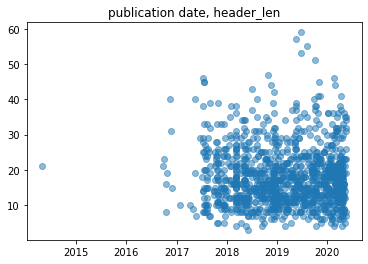

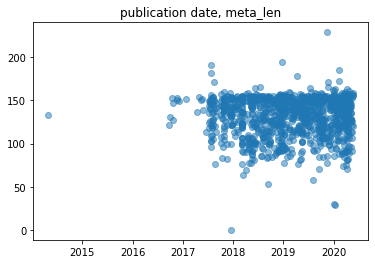

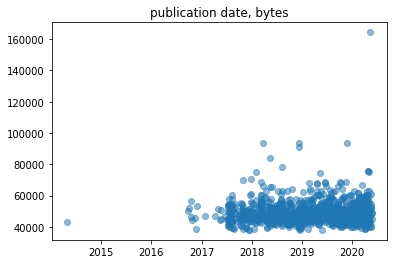

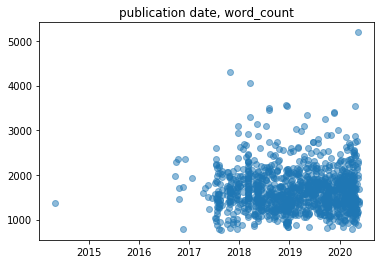

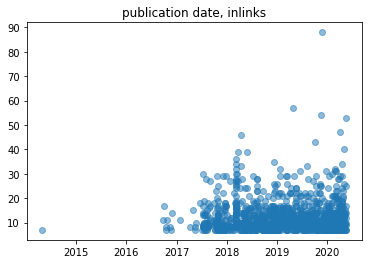

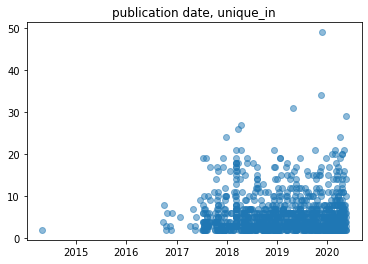

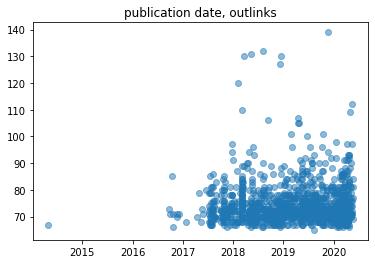

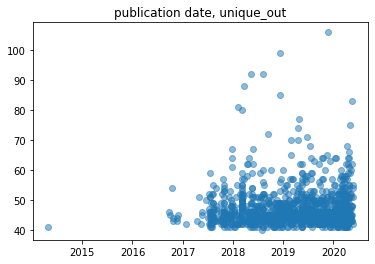

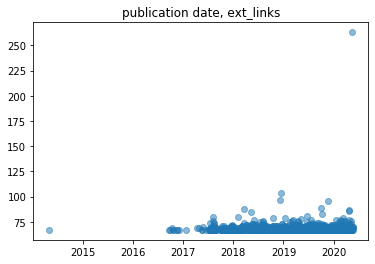

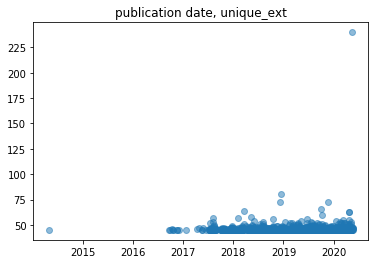

In [402]:
compare = ['header_len', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext']

for col in compare:
    pub(data[col], col)

### top-ranking pages of the Mayo Clinic domain

Main SEO boxes to check:
- link authority
- quality content
- publication date

Others that may give pages a boost:
- good headers
- word count
- url length
- page authority

In [466]:
ranked.columns

Index(['url', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext', 'top', 'pub_date'],
      dtype='object')

In [471]:
relate(ranked.pub_date, ranked.inlinks)

Covariance: 282.69251
Correlation: 0.10601
R squared: 0.01124
Linear Regression Slope: 0.002733121618710703


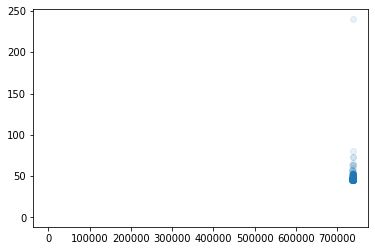

In [473]:
log_reg(ranked.pub_date, ranked.unique_ext)

In [475]:
for column in ['header_len', 'meta_len', 'bytes', 'word_count', 'total_links', 'inbound_domains', 'outbound_domains', 'ext_links', 'unique_ext', 'inlinks', 'unique_in', 'outlinks',
       'unique_out', 'pub_date']:
    model = LinearRegression().fit(data[[column]], data["page_auth"])
    print("%s coefficient: %.5f" % (column, model.coef_))

KeyError: 'page_auth'